In [381]:
# Librerías necesarias
import pandas as pd
import numpy as np

#import seaborn as sns
#from sklearn.model_selection import train_test_split
# Las comentadas son para futuro uso pero aún no son están en uso

In [382]:
# Nota  
#Este notebook requiere tener instaladas las siguientes librerías:  
#`pandas`, `numpy`, `matplotlib`, `seaborn`, `scikit-learn`, `notebook`  
#Si no las tienes, ejecuta en la terminal:
#`pip install pandas numpy matplotlib seaborn scikit-learn notebook`

In [383]:
#Lee el archivo de la database
df = pd.read_csv("stroke-dataset.csv")


In [384]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [385]:
#Muestra el tipo de dato de cada atributo
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [386]:
#Verifica la cantidad de datos NaN según categoría
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [387]:
#Cantidad de filas en el dataset antes de eliminación de NaN
len(df) 

5110

In [388]:
#Eliminar filas que contienen valores NaN  
df = df.dropna(axis=0)

In [389]:
#Cantidad de filas en el dataset post eliminación de NaN
len(df)

4909

In [390]:
#Revisar si hay datos duplicados (no los borra en caso de existir)
duplicados = df.duplicated()
print(df[duplicados])

Empty DataFrame
Columns: [id, gender, age, hypertension, heart_disease, ever_married, work_type, Residence_type, avg_glucose_level, bmi, smoking_status, stroke]
Index: []


In [391]:
#Verifica edades dentro de rangos válidos
pruebaage=df[df['age']>100]
print(pruebaage)

Empty DataFrame
Columns: [id, gender, age, hypertension, heart_disease, ever_married, work_type, Residence_type, avg_glucose_level, bmi, smoking_status, stroke]
Index: []


In [392]:
#Muestra si se conoce o no si es que fuma
fumadores_desconocidos = df[df["smoking_status"] == "Unknown"]
print(fumadores_desconocidos)

         id  gender   age  hypertension  heart_disease ever_married work_type  \
9     60491  Female  78.0             0              0          Yes   Private   
23    64778    Male  82.0             0              1          Yes   Private   
31    33879    Male  42.0             0              0          Yes   Private   
38    47306    Male  58.0             0              0           No   Private   
67    72366    Male  76.0             0              0          Yes   Private   
...     ...     ...   ...           ...            ...          ...       ...   
5098    579    Male   9.0             0              0           No  children   
5101  36901  Female  45.0             0              0          Yes   Private   
5103  22127  Female  18.0             0              0           No   Private   
5104  14180  Female  13.0             0              0           No  children   
5109  44679  Female  44.0             0              0          Yes  Govt_job   

     Residence_type  avg_gl

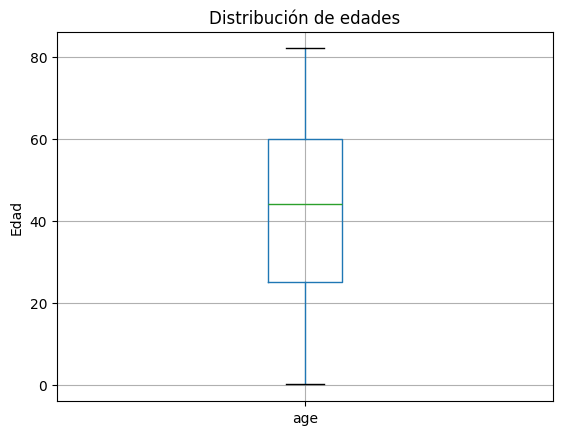

In [393]:
#pip install matplotlib
import matplotlib.pyplot as plt
df.boxplot(column='age')
plt.title('Distribución de edades')
plt.ylabel('Edad')

plt.show()

In [394]:
#Cantidad de filas antes de borrar outliers BMI
len(df) 

4909

In [395]:
#Mostrar outliers BMI
Q1 = df["bmi"].quantile(0.25)
Q3 = df["bmi"].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR
print(limite_inferior, limite_superior)
outliers = df[(df["bmi"] < limite_inferior) | (df["bmi"] > limite_superior)]
print(outliers)


df_sin = df[(df["bmi"] >= limite_inferior) & (df["bmi"] <= limite_superior)]

9.099999999999998 47.5
         id  gender   age  hypertension  heart_disease ever_married  \
21    13861  Female  52.0             1              0          Yes   
113   41069  Female  45.0             0              0          Yes   
254   32257  Female  47.0             0              0          Yes   
258   28674  Female  74.0             1              0          Yes   
270   72911  Female  57.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
4858   1696  Female  43.0             0              0          Yes   
4906  72696  Female  53.0             0              0          Yes   
4952  16245    Male  51.0             1              0          Yes   
5009  40732  Female  50.0             0              0          Yes   
5057  38349  Female  49.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
21    Self-employed          Urban          

In [396]:
#Cantidad de filas después de borrar outliers BMI
len(df) 

4909

In [397]:
#Mostrar outliers
Q1 = df["avg_glucose_level"].quantile(0.25)
Q3 = df["avg_glucose_level"].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR
print(limite_inferior, limite_superior)
outliers = df[(df["avg_glucose_level"] < limite_inferior) | (df["avg_glucose_level"] > limite_superior)]

print(outliers)

df_sin_outliers = df[(df["avg_glucose_level"] >= limite_inferior) & (df["avg_glucose_level"] <= limite_superior)]

22.319999999999993 168.32
         id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
5     56669    Male  81.0             0              0          Yes   
14     5317  Female  79.0             0              1          Yes   
...     ...     ...   ...           ...            ...          ...   
5061  38009    Male  41.0             0              0          Yes   
5062  11184  Female  82.0             0              0          Yes   
5063  68967    Male  39.0             0              0          Yes   
5064  66684    Male  70.0             0              0          Yes   
5076  39935  Female  34.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban       

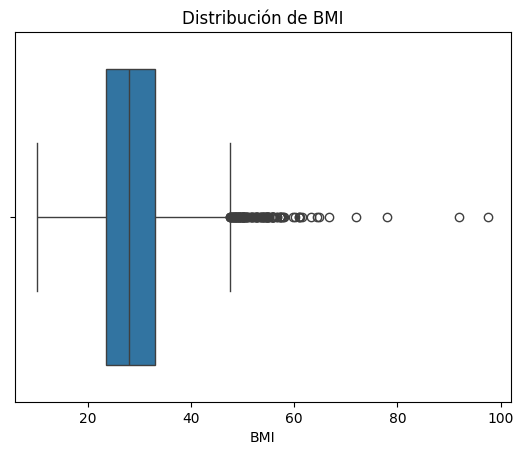

In [398]:
import seaborn as sns

sns.boxplot(x=df['bmi'])
plt.title('Distribución de BMI')
plt.xlabel('BMI')
plt.show()


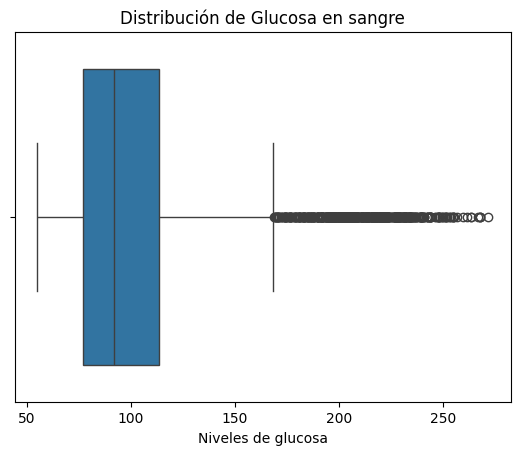

In [399]:
sns.boxplot(x=df['avg_glucose_level'])
plt.title('Distribución de Glucosa en sangre')
plt.xlabel('Niveles de glucosa')
plt.show()


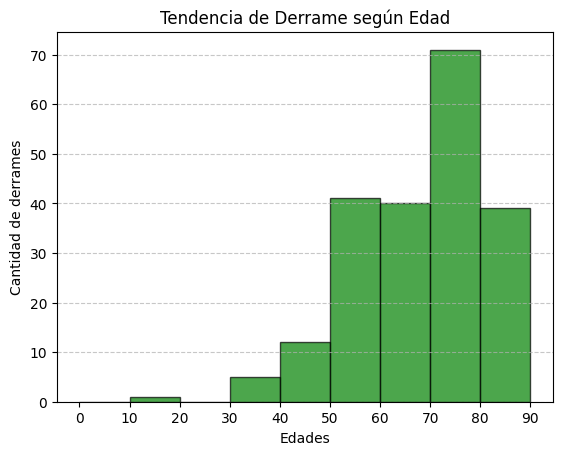

In [400]:
#Nos ayudará para separar a los que si han tenido un derrame
df_stroke = df[df["stroke"] == 1]

bins = list(range(0, 100, 10))
plt.hist(df_stroke["age"], bins=bins, edgecolor="black", alpha=0.7, color='green')
plt.title('Tendencia de Derrame según Edad')
plt.xlabel('Edades')
plt.ylabel('Cantidad de derrames')
plt.xticks(bins)  # Ajustar las etiquetas en el eje X
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


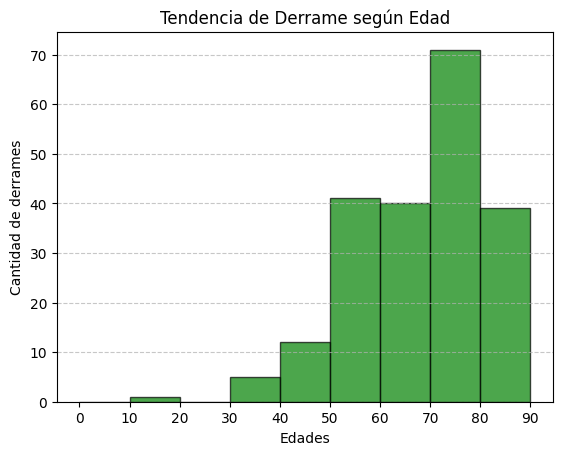

In [401]:
#Nos ayudará para separar a los que si han tenido un derrame
df_stroke = df[df["stroke"] == 1]

bins = list(range(0, 100, 10))
plt.hist(df_stroke["age"], bins=bins, edgecolor="black", alpha=0.7, color='green')
plt.title('Tendencia de Derrame según Edad')
plt.xlabel('Edades')
plt.ylabel('Cantidad de derrames')
plt.xticks(bins)  # Ajustar las etiquetas en el eje X
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

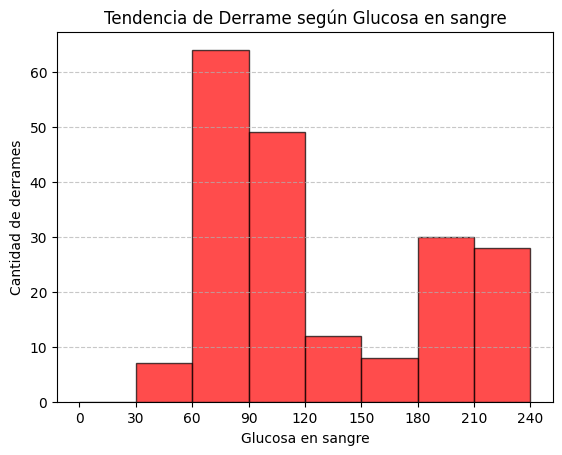

In [402]:
df_stroke = df[df["stroke"] == 1]

bins = list(range(0, 250, 30))
plt.hist(df_stroke["avg_glucose_level"], bins=bins, edgecolor="black", alpha=0.7, color='red')
plt.title('Tendencia de Derrame según Glucosa en sangre')
plt.xlabel('Glucosa en sangre')
plt.ylabel('Cantidad de derrames')
plt.xticks(bins)  # Ajustar las etiquetas en el eje X
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

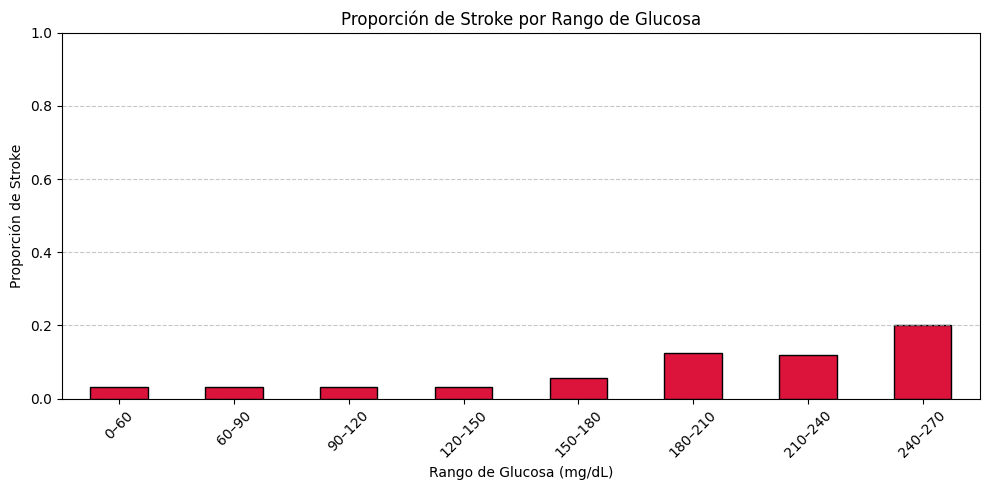

In [403]:
bins = [0, 60, 90, 120, 150, 180, 210, 240, 270]
labels = [f'{bins[i]}–{bins[i+1]}' for i in range(len(bins)-1)]

# Creamos columna con los cortes
df['glucose_bin'] = pd.cut(df['avg_glucose_level'], bins=bins, labels=labels, right=False)

# Calculamos la proporción de stroke por bin
stroke_rates = df.groupby('glucose_bin', observed=True)['stroke'].mean()

# Graficamos
plt.figure(figsize=(10, 5))
stroke_rates.plot(kind='bar', color='crimson', edgecolor='black')
plt.title('Proporción de Stroke por Rango de Glucosa')
plt.xlabel('Rango de Glucosa (mg/dL)')
plt.ylabel('Proporción de Stroke')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

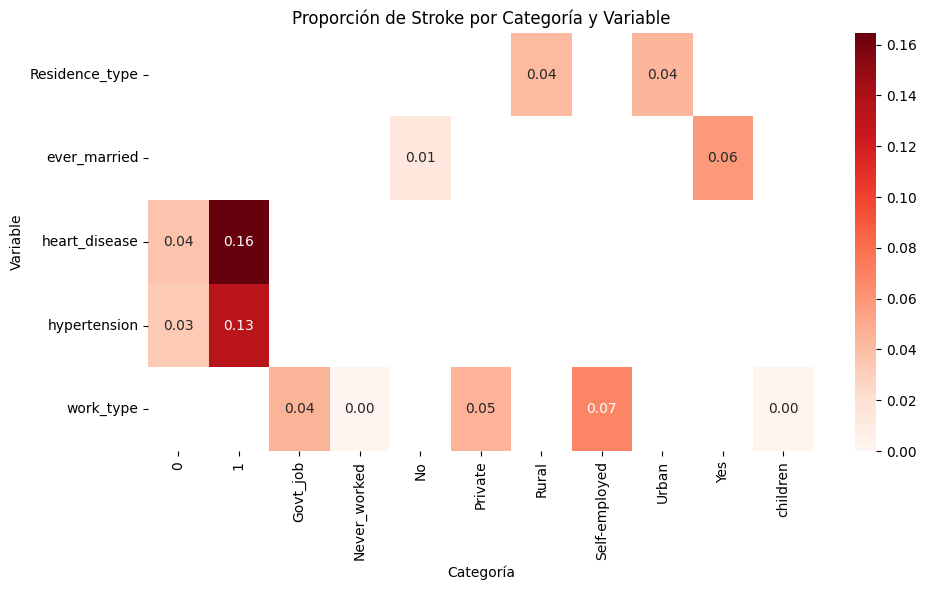

In [404]:
# Variables categóricas que quieras analizar
variables = ['hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type']

# Lista para guardar resultados
resultados = []

# Recorremos cada variable y calculamos proporción de stroke == 1
for var in variables:
    proporciones = pd.crosstab(df[var], df['stroke'], normalize='index')
    if 1 in proporciones.columns:
        for categoria, valor in proporciones[1].items():
            resultados.append({
                'Variable': var,
                'Categoría': categoria,
                'Proporción_Stroke': valor
            })

# Lo convertimos en DataFrame
df_resultados = pd.DataFrame(resultados)

# Hacemos un heatmap pivotando
pivot = df_resultados.pivot(index='Variable', columns='Categoría', values='Proporción_Stroke')

# Graficamos
plt.figure(figsize=(10, 6))
sns.heatmap(pivot, annot=True, cmap='Reds', fmt=".2f")
plt.title("Proporción de Stroke por Categoría y Variable")
plt.xlabel("Categoría")
plt.ylabel("Variable")
plt.tight_layout()
plt.show()

In [405]:
#Mediana
df.groupby('stroke')[['age', 'avg_glucose_level', 'bmi']].median()

,age,avg_glucose_level,bmi
stroke,,,
0,43.0,91.21,28.0
1,70.0,106.58,29.7


In [406]:
pd.crosstab(df['stroke'], df['hypertension'], normalize='index')

hypertension,0,1
stroke,,
0,0.916809,0.083191
1,0.712919,0.287081


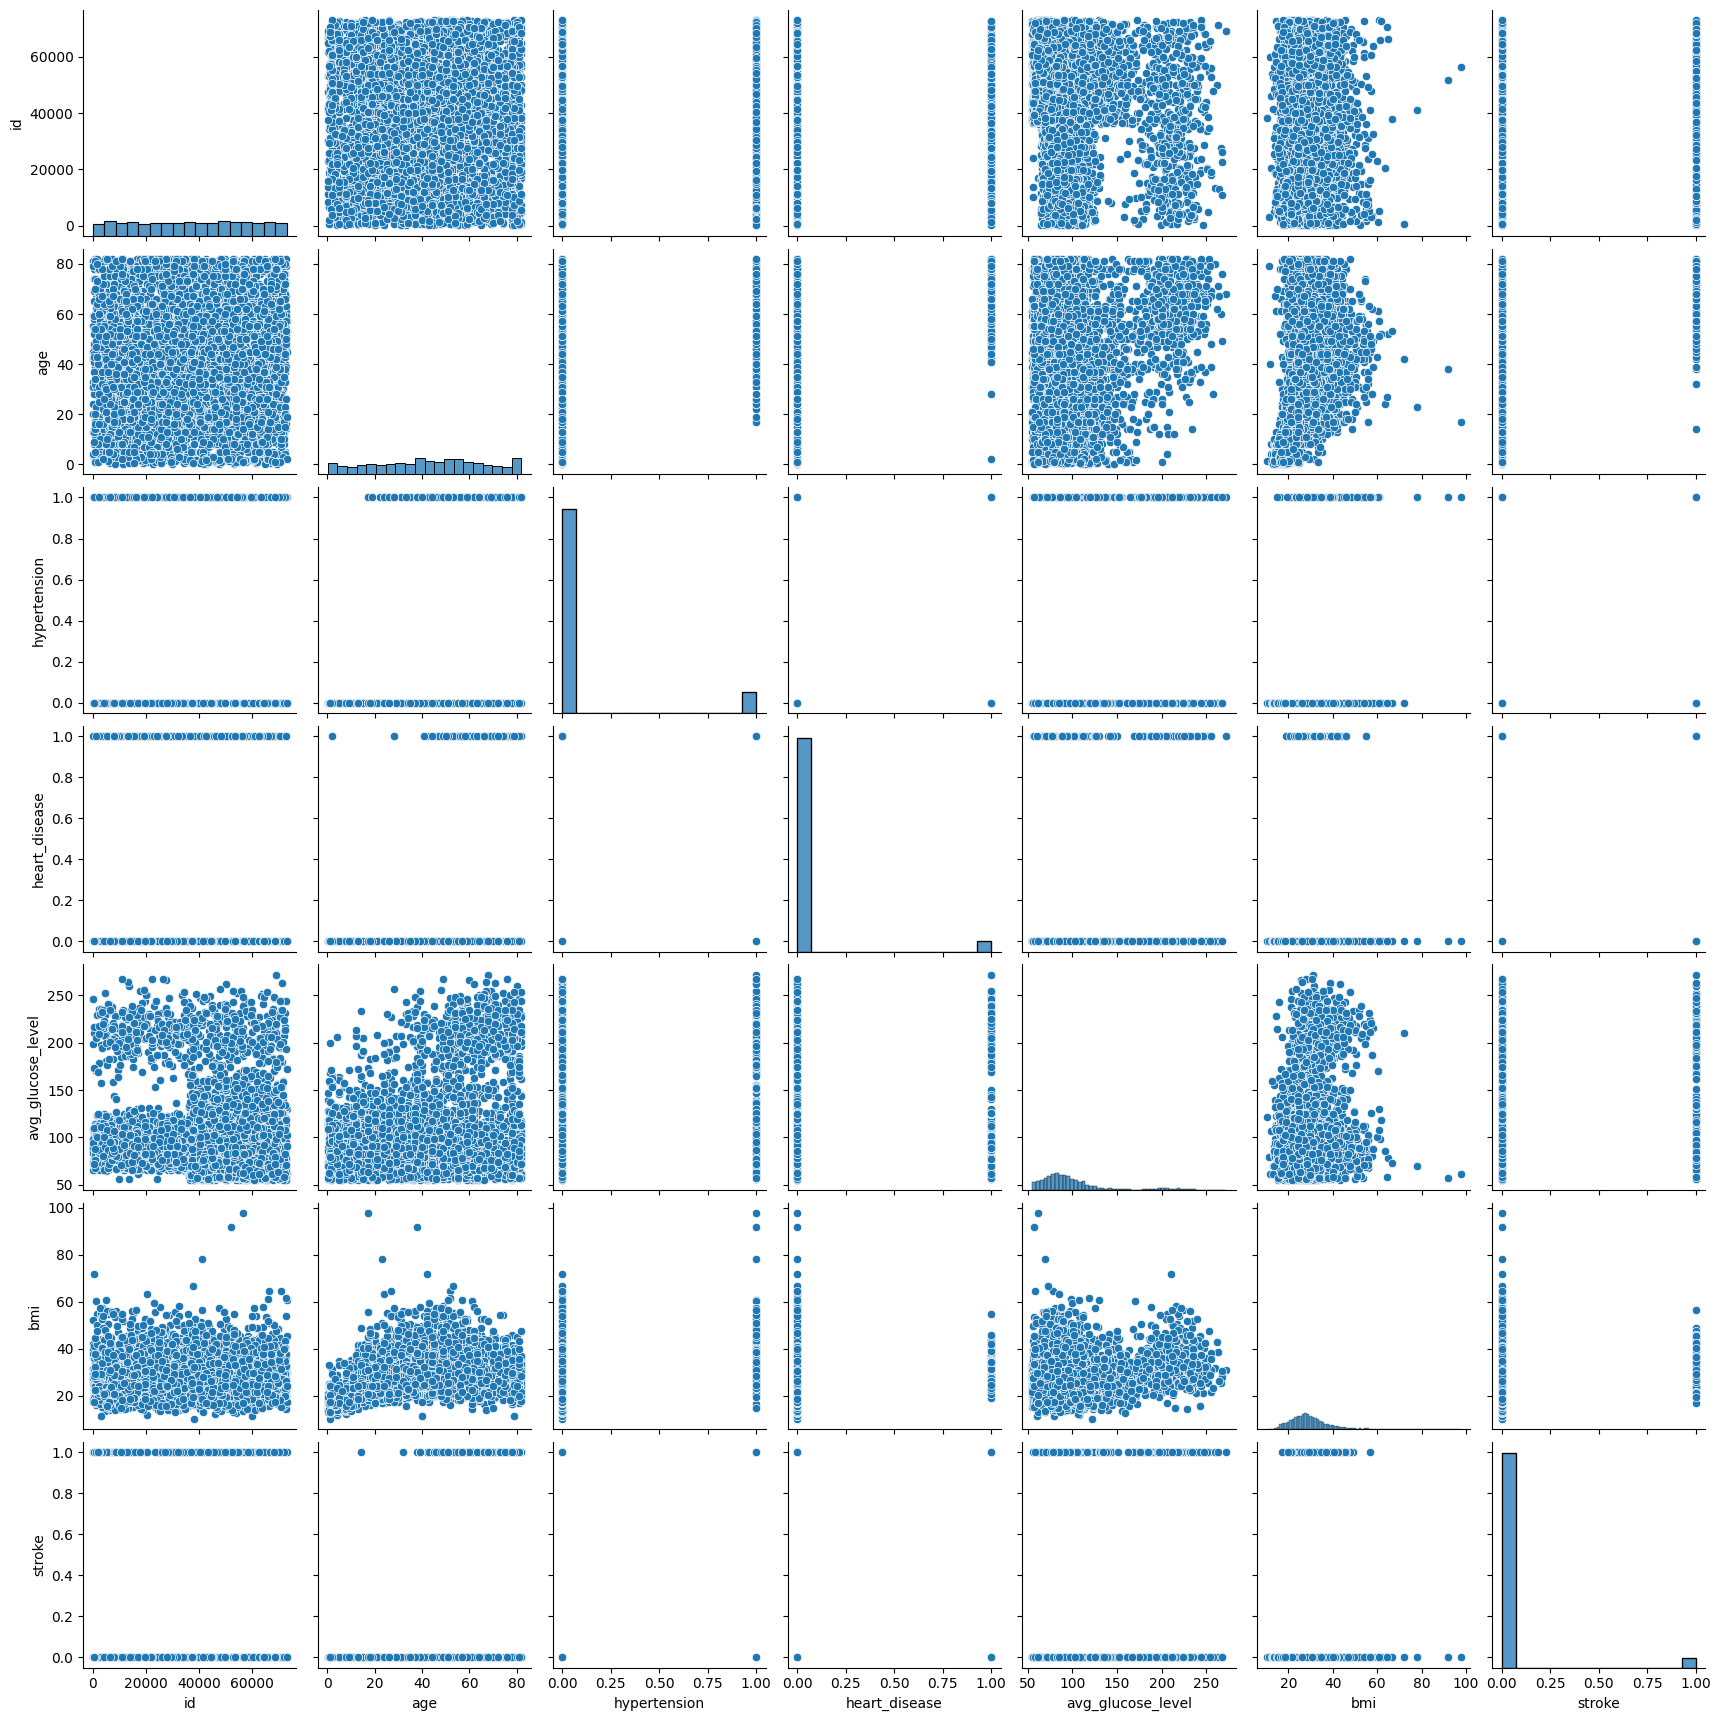

In [407]:
sns.pairplot(df)
plt.show()